RANDOM FOREST REGRESSION - PREDCITON MODEL

read file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

loading traning dataset

In [2]:
df = pd.read_csv("dataset/ETH-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05
1,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05
2,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05
3,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06
4,2015-08-12,1.058750,1.289940,0.883608,1.217440,1.217440,2.150620e+06
...,...,...,...,...,...,...,...
2115,2021-05-23,2298.367188,2384.411621,1737.468750,2109.579834,2109.579834,5.600572e+10
2116,2021-05-24,2099.936035,2672.595703,2090.639648,2643.591064,2643.591064,5.369712e+10
2117,2021-05-25,2649.033203,2750.534912,2394.355469,2706.628906,2706.628906,4.955833e+10
2118,2021-05-26,2707.052734,2911.735596,2652.094482,2888.698730,2888.698730,4.249977e+10


Little Visualise

<Axes: xlabel='Date'>

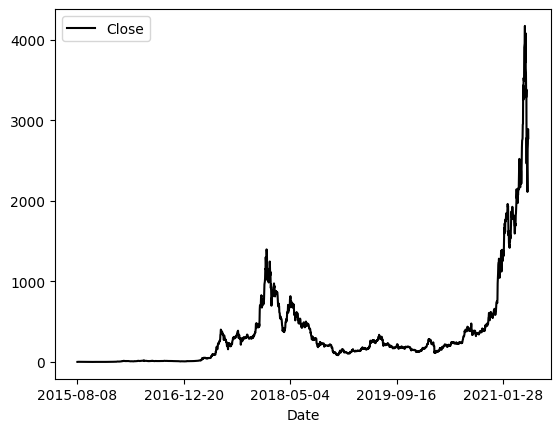

In [3]:
df.plot.line(y="Close",x="Date",color="black")

remove unnecessary


In [4]:
df = df.drop(["Volume","High","Low","Open","Adj Close"],axis=1)

In [5]:
df.loc[0:1]

,Date,Close
0,2015-08-08,0.753325
1,2015-08-09,0.701897


Ensure Date: Type[DateTime Object] Instead of [object]

In [6]:
df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2120 entries, 0 to 2119
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
2120 non-null   object
dtypes: object(1)
memory usage: 16.7+ KB


InCase Date: Type[Str] function which convert date into Datetime Object

In [255]:
# import datetime 
# df["Date"] = [dt.strftime('%Y-%m-%d') for dt in df["Date"]]   # Conversion Datetime into Str For Education 
# df["Date"].info()

In [7]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year,month,day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year,month=month,day=day)
# print(str_to_datetime("1999-05-25"))


In [8]:
df["Date"]=df["Date"].apply(str_to_datetime)

In [9]:
df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2120 entries, 0 to 2119
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
2120 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 16.7 KB


In [10]:
df["Close"].isna().sum()
# df['Close'] = df['Close'].fillna(method='ffill')
df['Close'] = df['Close'].ffill()

 Datetime -> Ordinal 

In [12]:
df['date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)
X = df[['date_ordinal']]
y = df["Close"]

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Features and Target
X = df[['date_ordinal']]
y = df["Close"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 678.4713445433393
R² Score: 0.9964939402921958


In [14]:
X_train.loc[0:0]

,date_ordinal
0,735818


In [25]:
for i in range(0,2):
    print(y_pred[i])


112.06887709000016
11.165808


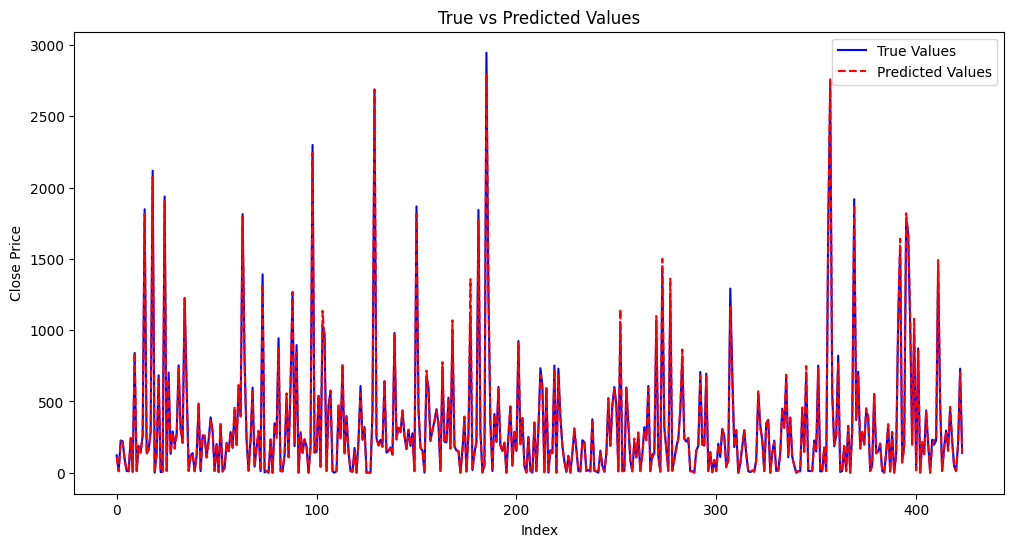

In [295]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='True Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='--')

# Adding title and labels
plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()


Code to Convert Predicted Array into a DataFrame with Date Index

In [26]:
# Recover the dates from X_test since that holds date_ordinal
predicted_df = pd.DataFrame({
    'Date': X_test['date_ordinal'].map(datetime.datetime.fromordinal),
    'Predicted Close': y_pred.round(2)
})

# Sort by date if needed
predicted_df = predicted_df.sort_values('Date').reset_index(drop=True)

# Final result

print(predicted_df.head())


        Date  Predicted Close
0 2015-08-16             1.56
1 2015-09-14             0.95
2 2015-09-17             0.90
3 2015-09-24             0.89
4 2015-09-25             0.79


Unseen Data Prediction Next 30 Days

In [32]:
df_30 = pd.read_csv("Next-30-Date.csv")
df_30.drop(["Unnamed: 1"],axis=1).head()

,Date
0,2025-04-13
1,2025-04-14
2,2025-04-15
3,2025-04-16
4,2025-04-17


In [33]:
df_30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        30 non-null     object 
 1   Unnamed: 1  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


In [34]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year,month,day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year,month=month,day=day)
    

In [35]:
df_30["Date"] = df_30["Date"].apply(str_to_datetime)

In [36]:
df_30["ordinalDate"] = df_30["Date"].map(pd.Timestamp.toordinal)

In [37]:
df_3_X_test = df_30["ordinalDate"]
df_3_X_test = pd.DataFrame(df_3_X_test)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

df_3_X_test_Scalar = scaler.fit_transform(df_3_X_test)

In [39]:
df_3_X_test_Result = rf_model.predict(df_3_X_test_Scalar)


In [40]:
df_30["predicted"] = df_3_X_test_Result.round(2)

In [42]:
# Recover the dates from X_test since that holds date_ordinal
predicted_df = pd.DataFrame({
    'Date': df_3_X_test['ordinalDate'].map(datetime.datetime.fromordinal),
    'Predicted Close': df_3_X_test_Result.round(2)
})

# Sort by date if needed
predicted_df = predicted_df.sort_values('Date').reset_index(drop=True)

# Final result

print(predicted_df.head())


        Date  Predicted Close
0 2025-04-13             1.29
1 2025-04-14             0.91
2 2025-04-15             2.43
3 2025-04-16            10.32
4 2025-04-17            16.03


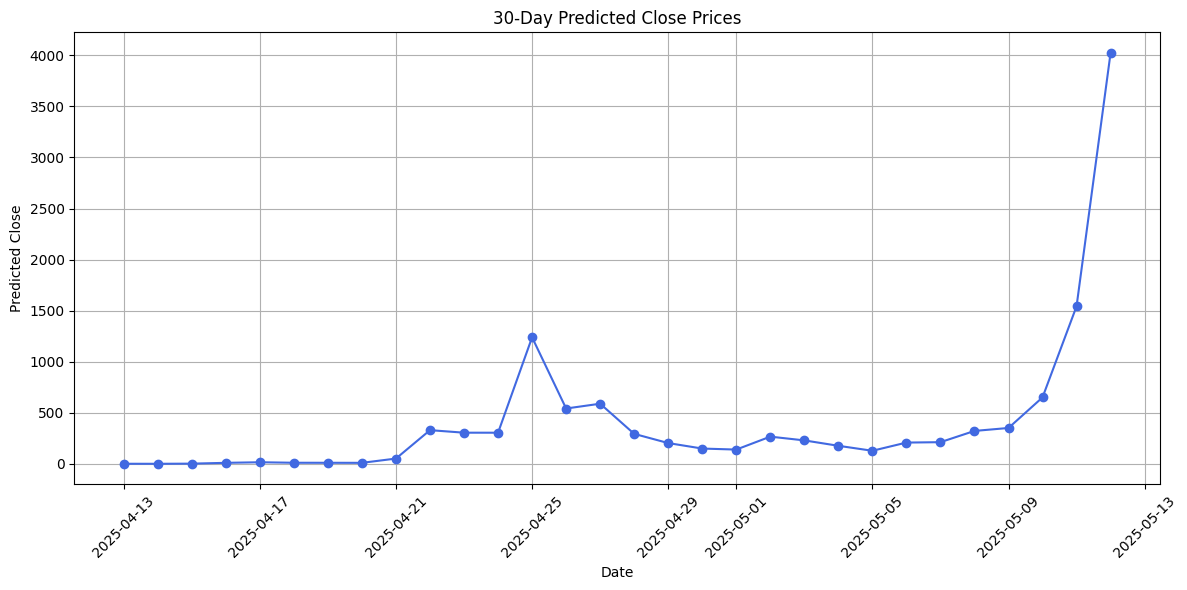

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_30['Date'], df_30["predicted"], marker='o', linestyle='-', color='royalblue')
plt.title('30-Day Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Predicted Close')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
